# Defining and displaying state vectors

In [2]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [9]:
display(u.draw('latex'))

<IPython.core.display.Latex object>

In [10]:
display(v.draw('latex'))

<IPython.core.display.Latex object>

The measure method simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement.

In [35]:
v.measure()

('1',
 Statevector([ 0.        +0.j        , -0.92387953+0.38268343j],
             dims=(2,)))

# visualization

Statevector also comes with a sample_counts method that allows for the simulation of any number of measurements on the system.

{'0': 505, '1': 395}

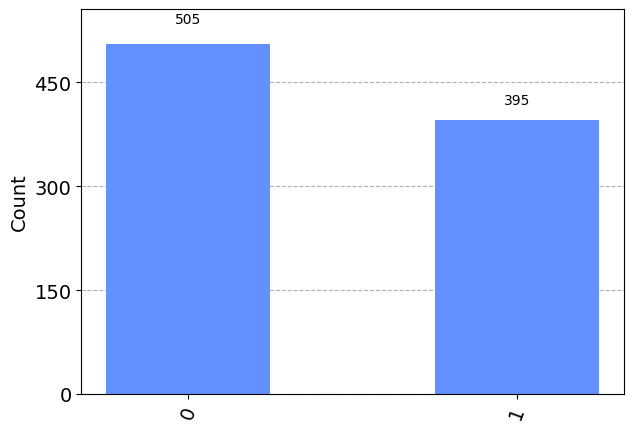

In [32]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(900)
display(statistics)
plot_histogram(statistics)

# Performing operations with Operator and Statevector

In [33]:
from qiskit.quantum_info import Operator

X = Operator([ [0,1],[1,0] ])
Y = Operator([ [0,-1.j],[1.j,0] ])
Z = Operator([ [1,0],[0,-1] ])
H = Operator([ [1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)] ])
S = Operator([ [1,0],[0,1.j] ])
T = Operator([ [1,0],[0,(1+1.j)/sqrt(2)] ])

v = Statevector([1,0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

# Quantum circuits

In [37]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [38]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw('latex')

<IPython.core.display.Latex object>

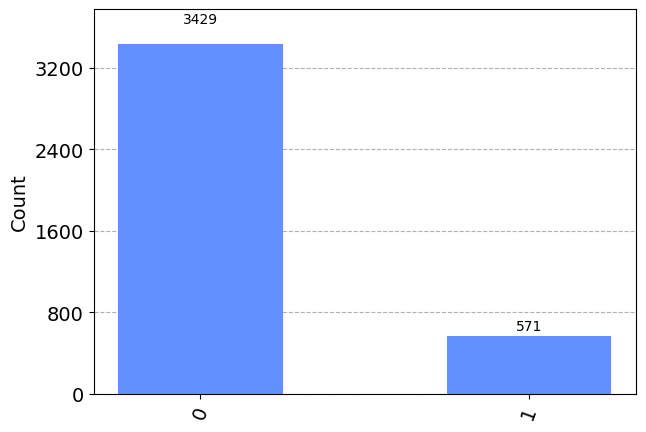

In [39]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)